In [2]:
!pip install grad-cam opencv-python -q

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, accuracy_score
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from PIL import Image #tkinter ka part h
from tqdm import tqdm #prog bar for loops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s 

In [3]:
from google.colab import drive
drive.mount('/content/drive')


DATA_DIR='/content/drive/MyDrive/summer project/summmer dataset'
TRAIN_DIR=os.path.join(DATA_DIR,'Training') #datasets direcs
TEST_DIR=os.path.join(DATA_DIR,'Testing')

Mounted at /content/drive


In [ ]:
#Model 1 100% Supervised Learning no Aug
image_size = (224, 224)
batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=True
)

# Load Testing Data (Completely Unseen)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=False
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Explicit input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
history=model.fit(train_data,epochs=15,validation_data=test_data)

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 937s 5s/step - accuracy: 0.5975 - loss: 29.3601 - val_accuracy: 0.8444 - val_loss: 0.4343
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.8862 - loss: 0.3248 - val_accuracy: 0.9130 - val_loss: 0.2598
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 809s 4s/step - accuracy: 0.9391 - loss: 0.1830 - val_accuracy: 0.9321 - val_loss: 0.2278
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.9701 - loss: 0.0884 - val_accuracy: 0.8909 - val_loss: 0.3622
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 745s 4s/step - accuracy: 0.9590 - loss: 0.1225 - val_accuracy: 0.9359 - val_loss: 0.2490
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.9832 - loss: 0.0509 - val_accuracy: 0.9497 - val_loss: 0.2470
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9420 - val_loss: 0.2267
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 742s 4s/step - accuracy: 0.9915 - loss: 0.0300 - val_acc

In [6]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.concatenate([y.numpy() for x, y in test_data],axis=0)
print(classification_report(true_labels, y_pred_classes))

41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       300
           1       0.94      0.90      0.91       306
           2       0.99      1.00      0.99       405
           3       0.95      1.00      0.97       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



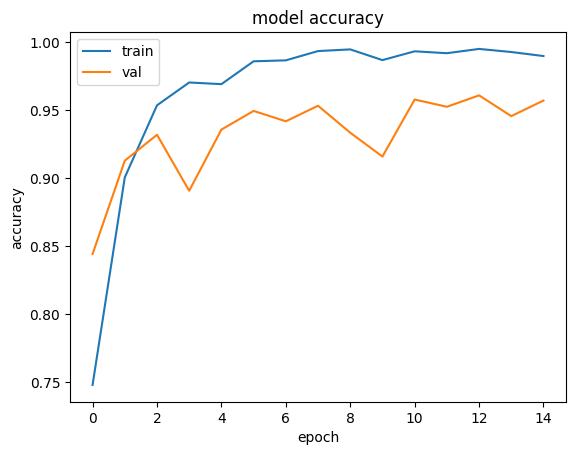

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

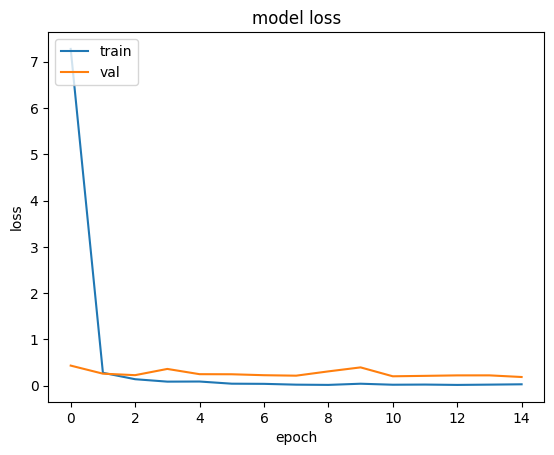

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [10]:
#Model 2 Supervised Learning 50% data without Aug
!unzip BT_50.zip -d /content/

Archive:  BT_50.zip
   creating: /content/BT_50/
   creating: /content/BT_50/Testing/
   creating: /content/BT_50/Testing/glioma/
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0000.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0001.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0002.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0003.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0004.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0005.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0006.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0007.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0008.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-glTr_0009.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-gl_0160.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-gl_0161.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-gl_0162.jpg  
  inflating: /content/BT_50/Testing/glioma/Te-gl_0163.jpg  
  inflatin

In [10]:
image_size = (224, 224)
batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Training",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=True
)

# Load Testing Data (Completely Unseen)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Testing",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=False
)

Found 2640 files belonging to 4 classes.
Found 600 files belonging to 4 classes.


In [11]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,869,924 (49.09 MB)

 Trainable params: 12,869,924 (49.09 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [15]:
# Train the model
# model.fit(train_data, epochs=20, validation_data=test_data,
#           callbacks=[early_stopping, reduce_lr])
history=model.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5940 - loss: 25.7421 - val_accuracy: 0.7683 - val_loss: 0.9194
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8841 - loss: 0.3036 - val_accuracy: 0.8000 - val_loss: 0.9838
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.9396 - loss: 0.1697 - val_accuracy: 0.8133 - val_loss: 1.0925
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9654 - loss: 0.0923 - val_accuracy: 0.8183 - val_loss: 0.8544
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9607 - loss: 0.1138 - val_accuracy: 0.8267 - val_loss: 1.2364
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9751 - loss: 0.1082 - val_accuracy: 0.8167 - val_loss: 1.2261
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9754 - loss: 0.0770 - val_accuracy: 0.8467 - val_loss: 1.3773
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.8250 - 

In [16]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.concatenate([y.numpy() for x, y in test_data], axis=0)
print(classification_report(true_labels, y_pred_classes))

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 477ms/step
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       150
           1       0.73      0.89      0.80       150
           2       0.89      0.99      0.94       150
           3       0.98      0.65      0.78       150

    accuracy                           0.83       600
   macro avg       0.85      0.83      0.83       600
weighted avg       0.85      0.83      0.83       600



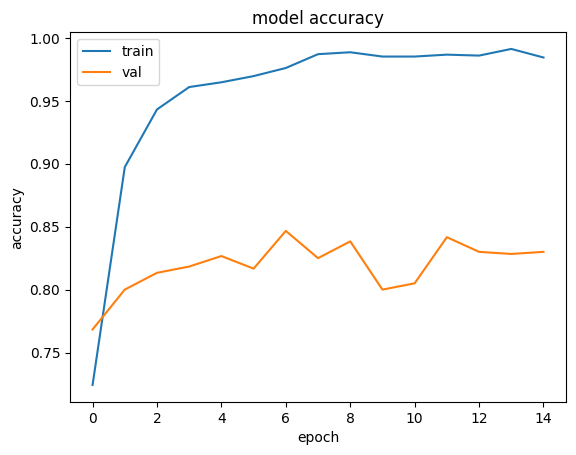

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

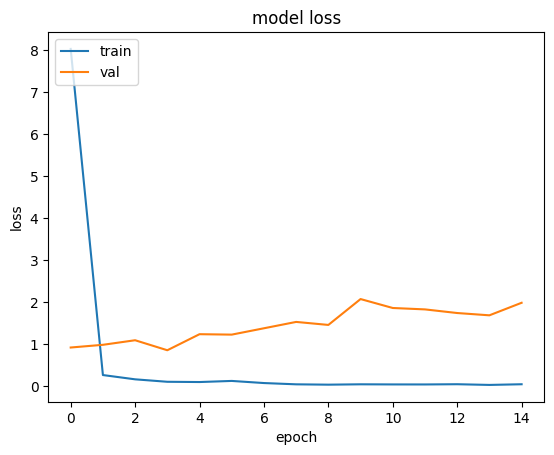

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [19]:
#Model 3 SL 50% with Aug
IMG_SIZE=(128, 128)
BATCH_SIZE=32

train_dir="BT_50/Training"

In [20]:
# Define augmentation functions
def augment_image(image):
    """Apply rotation, flipping, zoom, brightness, and contrast adjustments."""

    # Random Rotation (-20 to +20 degrees)
    image = tf.image.rot90(image, k=random.choice([0, 1, 2, 3]))

    # Random Flip
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    # Random Zoom (Crop and Resize)
    crop_fraction = random.uniform(0.7, 1.0)  # Zoom range
    img_shape = tf.shape(image)

    # Cast img_shape elements to float32 before multiplication
    crop_size = [int(tf.cast(img_shape[0], tf.float32) * crop_fraction),
                 int(tf.cast(img_shape[1], tf.float32) * crop_fraction), 3]

    image = tf.image.random_crop(image, crop_size)
    image = tf.image.resize(image, (img_shape[0], img_shape[1]))

    # Random Brightness and Contrast
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    return image

In [21]:
# Process each class in training folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip if not a folder

    # Get image files
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    num_augmented = len(image_files)*2  # Generate 50% more images

    for i in range(num_augmented):
        img_name = random.choice(image_files)  # Pick a random image
        img_path = os.path.join(class_path, img_name)

        # Load image
        image = load_img(img_path)
        image = img_to_array(image) / 255.0  # Normalize

        # Apply augmentation
        augmented_image = augment_image(image)

        # Convert back to image
        augmented_image = array_to_img(augmented_image)

        # Save augmented image in the same folder
        new_filename = f"aug_{i}_{img_name}"
        augmented_image.save(os.path.join(class_path, new_filename))

print("Augmentation complete! Images saved in the existing training folder.")

Augmentation complete! Images saved in the existing training folder.


In [22]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Training",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Testing",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

Found 7920 files belonging to 4 classes.
Found 600 files belonging to 4 classes.


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [24]:
model=create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,172 (434.27 KB)

 Trainable params: 110,724 (432.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.4999 - loss: 1.1284 - val_accuracy: 0.5767 - val_loss: 0.9982 - learning_rate: 1.0000e-04
Epoch 2/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.6689 - loss: 0.7975 - val_accuracy: 0.7167 - val_loss: 0.6851 - learning_rate: 1.0000e-04
Epoch 3/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.7239 - loss: 0.6852 - val_accuracy: 0.7550 - val_loss: 0.5932 - learning_rate: 1.0000e-04
Epoch 4/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.7694 - loss: 0.5857 - val_accuracy: 0.7800 - val_loss: 0.5394 - learning_rate: 1.0000e-04
Epoch 5/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.7904 - loss: 0.5317 - val_accuracy: 0.7633 - val_loss: 0.6816 - learning_rate: 1.0000e-04
Epoch 6/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.8122 - loss: 0.4844 - val_accuracy: 0.8133 - val_loss: 0.5124 - learning_rate: 1.0000e-04
Epoch 7/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - acc

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Get true labels from test_data
y_true = []
for images, labels in test_data:
    y_true.extend(labels.numpy())

y_true = np.argmax(y_true, axis=1)  # Convert one-hot to class labels

# Get predictions from the model
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step
Accuracy: 0.8533333333333334


              precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.77      0.66      0.71       150
           2       0.95      0.97      0.96       150
           3       0.91      0.97      0.94       150

   micro avg       0.85      0.85      0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600
 samples avg       0.85      0.85      0.85       600



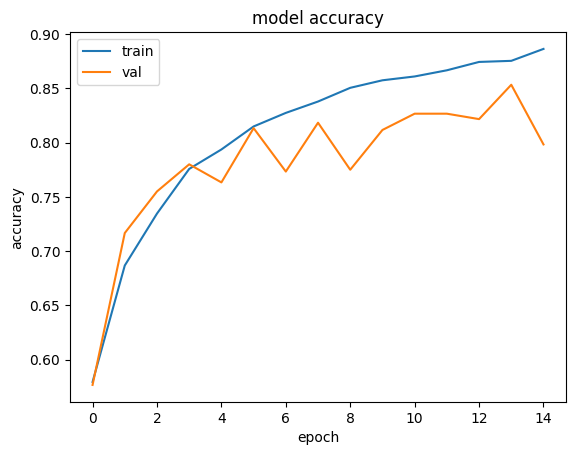

In [27]:
# Convert true labels to one-hot format
encoder = OneHotEncoder(sparse_output=False)  # Ensure dense output
y_true_onehot = encoder.fit_transform(y_true.reshape(-1, 1))
y_pred_onehot = encoder.transform(y_pred.reshape(-1, 1))

# Print classification report
print(classification_report(y_true_onehot, y_pred_onehot, zero_division=1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

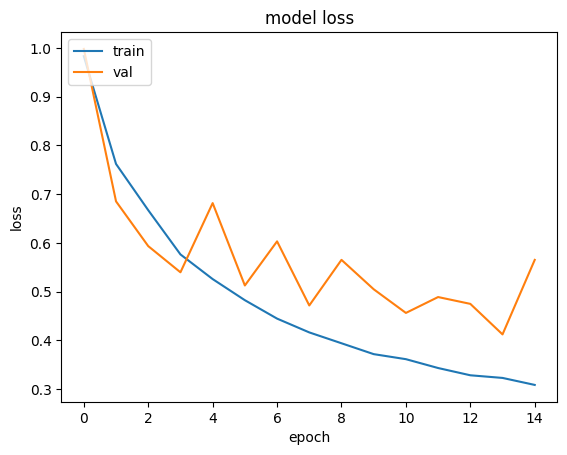

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [29]:
#MODEL 4 50% WITHOUT AUG AND PRE-TRAINED EfficientNetB0
image_size = (224, 224)
batch_size = 32


train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Training",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Testing",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=False
)

Found 7920 files belonging to 4 classes.
Found 600 files belonging to 4 classes.


In [30]:
#Pre-trained model
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


pre_Trained_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])


pre_Trained_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history=pre_Trained_model.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 673s 3s/step - accuracy: 0.7378 - loss: 0.6184 - val_accuracy: 0.8500 - val_loss: 0.3711
Epoch 2/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 694s 3s/step - accuracy: 0.8755 - loss: 0.3304 - val_accuracy: 0.8700 - val_loss: 0.3357
Epoch 3/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 731s 3s/step - accuracy: 0.8917 - loss: 0.2754 - val_accuracy: 0.8717 - val_loss: 0.3408
Epoch 4/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 772s 3s/step - accuracy: 0.9020 - loss: 0.2511 - val_accuracy: 0.8850 - val_loss: 0.3250
Epoch 5/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 734s 3s/step - accuracy: 0.9134 - loss: 0.2253 - val_accuracy: 0.8900 - val_loss: 0.3218
Epoch 6/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 740s 3s/step - accuracy: 0.9221 - loss: 0.1933 - val_accuracy: 0.9083 - val_loss: 0.3317
Epoch 7/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 698s 3s/step - accuracy: 0.9203 - loss: 0.1989 - val_accuracy: 0.8933 - val_loss: 0.3243
Epoch 8/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 753s 3s/step - accuracy: 0.9309 - loss: 0.1756 - val_accu

In [32]:
from sklearn.metrics import classification_report

y_pred = pre_Trained_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.concatenate([y.numpy() for x, y in test_data], axis=0)
print(classification_report(true_labels, y_pred_classes))

19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       150
           1       0.90      0.80      0.85       150
           2       0.97      0.99      0.98       150
           3       0.93      1.00      0.96       150

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



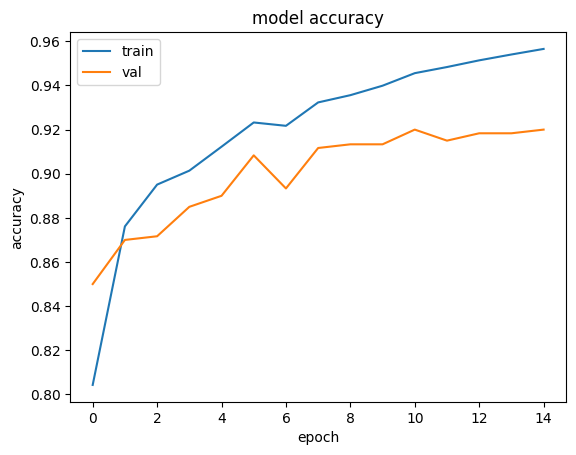

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

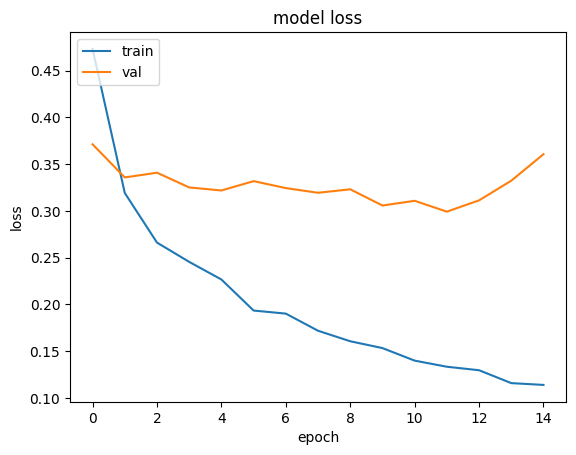

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [11]:
#MODEL 5 50% WITH AUG AND PRE-TRAINED EfficientNetB0
image_size = (224, 224)
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Training",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=True
)


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT_50/Testing",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=False
)

Found 2640 files belonging to 4 classes.
Found 600 files belonging to 4 classes.


In [12]:
#Pre-trained model
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


pre_Trained_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])


pre_Trained_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history=pre_Trained_model.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.6561 - loss: 0.7607 - val_accuracy: 0.8267 - val_loss: 0.4327
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.8673 - loss: 0.3458 - val_accuracy: 0.8433 - val_loss: 0.3701
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.8815 - loss: 0.3075 - val_accuracy: 0.8667 - val_loss: 0.3263
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.8921 - loss: 0.2593 - val_accuracy: 0.8633 - val_loss: 0.3217
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9042 - loss: 0.2585 - val_accuracy: 0.8600 - val_loss: 0.3889
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9081 - loss: 0.2294 - val_accuracy: 0.8833 - val_loss: 0.2954
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9289 - loss: 0.1852 - val_accuracy: 0.8783 - val_loss: 0.3084
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.9319 - loss: 0.1718 - val_accuracy: 0.8783 - v

In [14]:
y_pred = pre_Trained_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.concatenate([y.numpy() for x, y in test_data], axis=0)
print(classification_report(true_labels, y_pred_classes))

19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       150
           1       0.75      0.86      0.80       150
           2       0.97      0.99      0.98       150
           3       0.94      0.99      0.96       150

    accuracy                           0.89       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.89      0.89       600



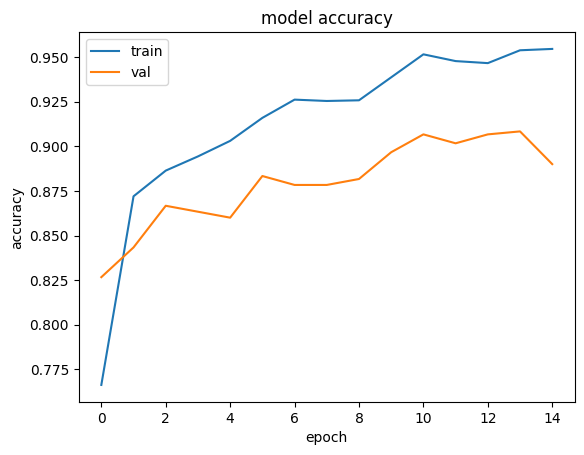

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

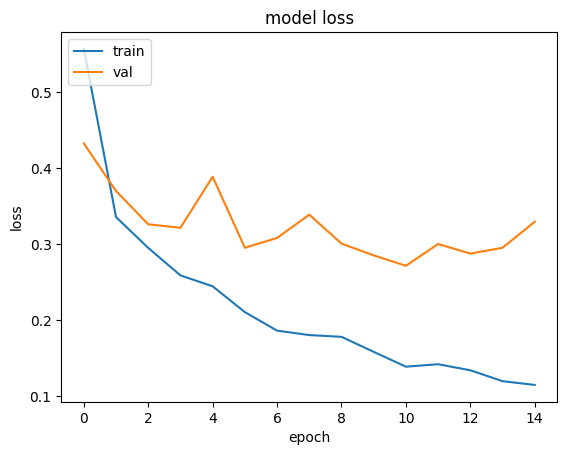

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [4]:
#NOW Model 6 and 7 Hypercolumn and baseline VGG16
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader #for model building and training
from torchvision import models, transforms #iske aandar pre-trained models, datasets and transforms rehta h
from torchvision.datasets import ImageFolder

In [5]:
DATA_DIR='/content/drive/MyDrive/summer project/summmer dataset'
TRAIN_DIR=os.path.join(DATA_DIR,'Training') #datasets direcs
TEST_DIR=os.path.join(DATA_DIR,'Testing')

mean,std=[0.485,0.456,0.406],[0.229,0.224,0.225] #normalize val
data_transforms={
    'train':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(), #flip kr deta h arti aug ke liye(images)
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    'test':transforms.Compose([
        transforms.Resize((224,224)), #VGG image size jisme wo trained hua tha
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
}

train_ds=ImageFolder(TRAIN_DIR,transform=data_transforms['train']) #label assign krta h folder names acc
test_ds=ImageFolder(TEST_DIR,transform=data_transforms['test'])
train_loader=DataLoader(train_ds,batch_size=16,shuffle=True,num_workers=2) #16 images load krega random order me and 2 subprocess ke liye
test_loader=DataLoader(test_ds,batch_size=16,shuffle=False,num_workers=2)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') #gpu khali h too
classes=train_ds.classes  # this is desc of all classes

In [6]:
#VGG-Hyper (multi layer)
class VGG16Hypercolumn(nn.Module):
    def __init__(self,num_classes=4,layer_idxs=[2,7,14,21,28]):
        super().__init__()
        backbone=models.vgg16(pretrained=True)
        self.features=backbone.features
        self.layer_idxs=layer_idxs
        for p in self.features.parameters(): p.requires_grad=False

        total_ch=sum(self.features[i].out_channels for i in layer_idxs) #total after concat of layer
        self.classifier=nn.Sequential(
            nn.Linear(total_ch,256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256,num_classes)
        )

    def forward(self, x):
        bs,_,H,W=x.shape
        feats,out=[],x
        for idx, layer in enumerate(self.features): #feature map nikalega
            out=layer(out)
            if idx in self.layer_idxs:
                up=F.interpolate(out,size=(H,W),
                                   mode='bilinear',align_corners=False)
                feats.append(up)
        hypercol=torch.cat(feats, dim=1) # iss format me rehta h batch_size,total_chnl,height,wid - batch_size,1472,224,224 - resizing
        pooled=F.adaptive_avg_pool2d(hypercol,(1,1)).view(bs,-1)
        return self.classifier(pooled)

#basic VGG (last layer)
class BaselineVGG16(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()
        backbone=models.vgg16(pretrained=True)
        self.features=backbone.features
        for p in self.features.parameters(): p.requires_grad=False

        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(25088,4096),nn.ReLU(True),nn.Dropout(0.5),
            nn.Linear(4096,4096),nn.ReLU(True),nn.Dropout(0.5),
            nn.Linear(4096,num_classes)
        )

    def forward(self,x):
        x=self.features(x)
        return self.classifier(x)

In [7]:
criterion=nn.CrossEntropyLoss() #loss func(multi-class)
model_hc=VGG16Hypercolumn().to(device)
model_base=BaselineVGG16().to(device)
opt_hc=optim.Adam(model_hc.classifier.parameters(),lr=1e-4) #gpu-cpu jo avail ho
opt_base=optim.Adam(model_base.classifier.parameters(),lr=1e-4)

def train_model(model,optimizer,epochs=10):
    for epoch in range(1,epochs+1): #loops epochs me
        model.train()
        running_loss=correct=total=0
        pbar=tqdm(train_loader,desc=f"Epoch {epoch}/{epochs}",leave=False)
        for imgs,labels in pbar: #loops batches me
            imgs,labels=imgs.to(device),labels.to(device)
            optimizer.zero_grad()
            outputs=model(imgs)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()*imgs.size(0)  #fwd pass-compt loss-bkwd pass-update wghts
            preds=outputs.argmax(dim=1)
            correct+=(preds==labels).sum().item()
            total+=imgs.size(0)
            avg_loss=running_loss/total
            avg_acc=correct/total #correct predic me total loss div krre
            pbar.set_postfix(loss=f"{avg_loss:.4f}",acc=f"{avg_acc:.4f}")

        print(f"Epoch{epoch}/{epochs}—Loss:{running_loss/total:.4f},Acc:{correct/total:.4f}")

def evaluate_model(model):
    model.eval()
    correct=total=0
    with torch.no_grad():
        for imgs,labels in test_loader:
            imgs,labels=imgs.to(device),labels.to(device)
            outputs=model(imgs)
            preds=outputs.argmax(dim=1)
            correct+=(preds==labels).sum().item()
            total+=imgs.size(0)
    acc = correct/total
    print(f"Test Accuracy:{acc:.4f}")
    return acc

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 176MB/s]


In [8]:
# checking hyper
print('Training Hypercolumn Model')
train_model(model_hc,opt_hc,epochs=15)
print('Evaluating Hypercolumn Model')
acc_hc=evaluate_model(model_hc)

# basic vgg
print('\nTraining Baseline VGG16 Model')
train_model(model_base,opt_base,epochs=15)
print('Evaluating Baseline VGG16 Model')
acc_base=evaluate_model(model_base)

Training Hypercolumn Model


Epoch1/15—Loss:1.0328,Acc:0.5802


Epoch2/15—Loss:0.7248,Acc:0.7215


Epoch3/15—Loss:0.6418,Acc:0.7481


Epoch4/15—Loss:0.5695,Acc:0.7875


Epoch5/15—Loss:0.5338,Acc:0.8001


Epoch6/15—Loss:0.5170,Acc:0.8078


Epoch7/15—Loss:0.4792,Acc:0.8214


Epoch8/15—Loss:0.4594,Acc:0.8337


Epoch9/15—Loss:0.4393,Acc:0.8381


Epoch10/15—Loss:0.4294,Acc:0.8389


Epoch11/15—Loss:0.4234,Acc:0.8437


Epoch12/15—Loss:0.4026,Acc:0.8519


Epoch13/15—Loss:0.3989,Acc:0.8528


Epoch14/15—Loss:0.3862,Acc:0.8615


Epoch15/15—Loss:0.3798,Acc:0.8608
Evaluating Hypercolumn Model


Test Accuracy:0.8612

Training Baseline VGG16 Model


Epoch1/15—Loss:0.4087,Acc:0.8522


Epoch2/15—Loss:0.1857,Acc:0.9396


Epoch3/15—Loss:0.1273,Acc:0.9559


Epoch4/15—Loss:0.0941,Acc:0.9671


Epoch5/15—Loss:0.0757,Acc:0.9751


Epoch6/15—Loss:0.0930,Acc:0.9709


Epoch7/15—Loss:0.0598,Acc:0.9790


Epoch8/15—Loss:0.0476,Acc:0.9835


Epoch9/15—Loss:0.0651,Acc:0.9800


Epoch10/15—Loss:0.0393,Acc:0.9884


Epoch11/15—Loss:0.0484,Acc:0.9860


Epoch12/15—Loss:0.0495,Acc:0.9858


Epoch13/15—Loss:0.0230,Acc:0.9932


Epoch14/15—Loss:0.0427,Acc:0.9900


Epoch15/15—Loss:0.0360,Acc:0.9895
Evaluating Baseline VGG16 Model


Test Accuracy:0.9664


In [9]:
from pytorch_grad_cam import GradCAM #feature vector ko highlight ke liye
from pytorch_grad_cam.utils.image import show_cam_on_image #heat map show krne ke liye
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

def explain_image(img_path, model,target_layer):
    model.eval()
    img=Image.open(img_path).convert('RGB')
    inp=data_transforms['test'](img).unsqueeze(0).to(device)
    inp.requires_grad_()
    logits=model(inp)
    probs=F.softmax(logits,dim=1)[0]
    idx=probs.argmax().item()
    print(f'Predicted:{classes[idx]},Confidence:{probs[idx]:.4f}') #class and pred

    cam=GradCAM(model=model,target_layers=[target_layer])
    targets=[ClassifierOutputTarget(idx)]
    gcam=cam(input_tensor=inp,targets=targets)[0]
    img_np=np.array(img.resize((224,224)))/255.0 #rescale and nromalize krre to [0,1]
    cam_img=show_cam_on_image(img_np,gcam,use_rgb=True) #heatmap display

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img);plt.axis('off');plt.title('Input')
    plt.subplot(1,2,2)
    plt.imshow(cam_img);plt.axis('off');plt.title('Grad-CAM')
    plt.show()

Predicted:glioma,Confidence:1.0000


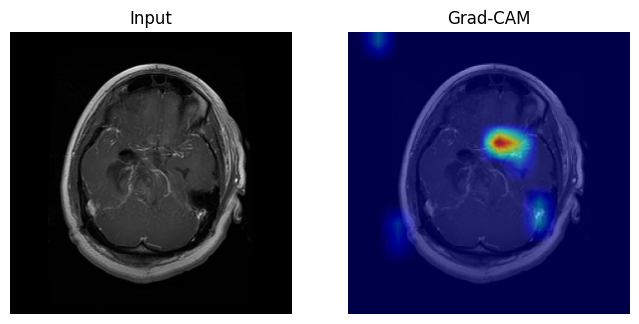

In [23]:
#taking sample image
sample_img=os.path.join(TEST_DIR,'glioma',
                 os.listdir(os.path.join(TEST_DIR,'glioma'))[78])
target_layer=model_base.features[27]  # idx 27 is used as Conv2d-cause learning feature isme h
explain_image(sample_img,model_base,target_layer)